## Author: Alexandru Paul Tabacaru  ;  alextabac@gmail.com
## MIT License

In [161]:
import pandas as pd
import numpy as np
from math import floor
import scipy.stats as stats
import os
import json
import random
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
from datetime import datetime
from collections import deque
from MASS_V4 import MASS_V4
from DAMP_V2 import DAMP_V2
from datetime import datetime
import matplotlib.pyplot as plt
from importlib import reload
from data_prep import Data_Preprocess as dprep

## Paths and Data Files

In [3]:
os.getcwd()

'C:\\ALEX\\BGU\\TDA\\PROJECT\\TSAD_project'

In [4]:
data_path = "..\\..\\sensors_data"
data_folder = os.path.join(os.getcwd(), data_path)
files1 = os.listdir(data_folder)
files2 = [os.path.join(data_folder, f) for f in files1 if f.endswith("_trim.tab")]
files = [f for f in files2 if os.path.isfile(f)]
delimiter = "\t"

## Equipment digits explained:
### first digit is the server NOD number:  1, 2, 3, or 4 otherwise
### second digit is the SITE within the NOD: 0, 1, 2.
### third digit is the entity number: 0 to 6 at most
### fourth digit is the side of the entity:  0 or 1

In [250]:
import data_prep
reload(data_prep)
from data_prep import Data_Preprocess as dprep

In [252]:
data_obj = dprep(aggregate_type='min', aggregate_amount=15, feature_num=2)
data_obj.load_data(files[0], delimiter)

File loaded with 11568827 rows.


In [253]:
len(data_obj.df)

3140370

In [254]:
data_obj.prepare_series()

Preparing key series Equip2000_Feature2_mean ...
Preparing key series Equip2001_Feature2_mean ...
Preparing key series Equip2010_Feature2_mean ...
Preparing key series Equip2011_Feature2_mean ...
Preparing key series Equip2050_Feature2_mean ...
Preparing key series Equip2051_Feature2_mean ...
Preparing key series Equip2060_Feature2_mean ...
Preparing key series Equip2061_Feature2_mean ...
Preparing key series Equip2020_Feature2_mean ...
Preparing key series Equip2021_Feature2_mean ...
Preparing key series Equip2031_Feature2_mean ...
Preparing key series Equip2040_Feature2_mean ...
Preparing key series Equip2041_Feature2_mean ...
Preparing key series Equip2030_Feature2_mean ...
Preparing key series Equip2000_Feature2_std ...
Preparing key series Equip2001_Feature2_std ...
Preparing key series Equip2010_Feature2_std ...
Found two clusters or more and need split, in dataset Equip2010_Feature2_std, indx 8107, delta 1.8514249414863468.
Preparing key series Equip2011_Feature2_std ...
Prepari

In [255]:
len(data_obj.dfs)

34

In [256]:
type(data_obj.dfs)

list

In [257]:
N = 0
for df in data_obj.dfs:
    N += len(df)
print(N)

367699


In [258]:
np.mean(data_obj.dfs[5]['value'])

-7.350572582590664e-16

In [259]:
np.std(data_obj.dfs[5]['value'])

1.0000000000000002

In [260]:
len(data_obj.dfs)

34

In [263]:
data_obj.dfs[10]

,time,RUN_START_WW,Equip,series,key,value
0,2022-06-27 01:45:00,202227,Equip2031,Feature2_mean,Equip2031_Feature2_mean,0.620855
1,2022-06-27 07:00:00,202227,Equip2031,Feature2_mean,Equip2031_Feature2_mean,0.467176
2,2022-06-27 13:30:00,202227,Equip2031,Feature2_mean,Equip2031_Feature2_mean,0.159094
3,2022-06-27 14:00:00,202227,Equip2031,Feature2_mean,Equip2031_Feature2_mean,-0.148988
4,2022-06-27 17:30:00,202227,Equip2031,Feature2_mean,Equip2031_Feature2_mean,4.671594
...,...,...,...,...,...,...
11671,2022-11-24 01:15:00,202248,Equip2031,Feature2_mean,Equip2031_Feature2_mean,-0.714712
11672,2022-11-24 01:45:00,202248,Equip2031,Feature2_mean,Equip2031_Feature2_mean,0.327343
11673,2022-11-24 02:00:00,202248,Equip2031,Feature2_mean,Equip2031_Feature2_mean,0.953970
11674,2022-11-24 02:15:00,202248,Equip2031,Feature2_mean,Equip2031_Feature2_mean,-0.825175


In [264]:
for i in range(len(data_obj.dfs)):
    print(data_obj.dfs[i].loc[0, 'key'])

Equip2000_Feature2_mean
Equip2001_Feature2_mean
Equip2010_Feature2_mean
Equip2011_Feature2_mean
Equip2050_Feature2_mean
Equip2051_Feature2_mean
Equip2060_Feature2_mean
Equip2061_Feature2_mean
Equip2020_Feature2_mean
Equip2021_Feature2_mean
Equip2031_Feature2_mean
Equip2040_Feature2_mean
Equip2041_Feature2_mean
Equip2030_Feature2_mean
Equip2000_Feature2_std
Equip2001_Feature2_std
Equip2010_Feature2_std
Equip2010_Feature2_std
Equip2010_Feature2_std
Equip2011_Feature2_std
Equip2050_Feature2_std
Equip2051_Feature2_std
Equip2060_Feature2_std
Equip2061_Feature2_std
Equip2020_Feature2_std
Equip2021_Feature2_std
Equip2031_Feature2_std
Equip2031_Feature2_std
Equip2031_Feature2_std
Equip2031_Feature2_std
Equip2031_Feature2_std
Equip2040_Feature2_std
Equip2041_Feature2_std
Equip2030_Feature2_std


In [265]:
data_obj.dfs[5]['value']

0        1.596570
1        1.715241
2        1.372563
3        0.360406
4        2.558051
           ...   
12904   -0.978973
12905   -1.080436
12906   -1.120397
12907   -1.324339
12908   -2.736174
Name: value, Length: 12909, dtype: float64

In [239]:
circflow_mean_idx = []
for i in range(len(data_obj.dfs)):
    if 'Feature9' in data_obj.dfs[i].loc[0, 'key'] and len(data_obj.dfs[i]) > 1000:
        circflow_mean_idx.append(i)
        print(f"index {i} - key {data_obj.dfs[i].loc[0, 'key']} - len {len(data_obj.dfs[i])}")

index 24 - key Equip2060_Feature9_mean - len 10267
index 29 - key Equip2061_Feature9_mean - len 10267
index 34 - key Equip2030_Feature9_mean - len 12748
index 39 - key Equip2031_Feature9_mean - len 12748
index 49 - key Equip2010_Feature9_mean - len 14790
index 54 - key Equip2011_Feature9_mean - len 14790
index 74 - key Equip2050_Feature9_mean - len 14514
index 79 - key Equip2051_Feature9_mean - len 14514
index 84 - key Equip2000_Feature9_mean - len 15748
index 89 - key Equip2001_Feature9_mean - len 15748
index 94 - key Equip2020_Feature9_mean - len 14944
index 99 - key Equip2021_Feature9_mean - len 14944
index 116 - key Equip2040_Feature9_mean - len 14319
index 121 - key Equip2041_Feature9_mean - len 9999
index 122 - key Equip2041_Feature9_mean - len 4320
index 123 - key Equip2041_Feature9_mean - len 14319
index 174 - key Equip2060_Feature9_std - len 10267
index 179 - key Equip2061_Feature9_std - len 10267
index 184 - key Equip2030_Feature9_std - len 12748
index 189 - key Equip2031_Fea

In [240]:
circflow_std_idx = []
for i in range(len(data_obj.dfs)):
    if 'Feature4' in data_obj.dfs[i].loc[0, 'key'] and len(data_obj.dfs[i]) > 1000:
        circflow_std_idx.append(i)
        print(f"index {i} - key {data_obj.dfs[i].loc[0, 'key']} - len {len(data_obj.dfs[i])}")

index 23 - key Equip2060_Feature4_mean - len 10267
index 28 - key Equip2061_Feature4_mean - len 10267
index 33 - key Equip2030_Feature4_mean - len 12748
index 38 - key Equip2031_Feature4_mean - len 12748
index 48 - key Equip2010_Feature4_mean - len 14790
index 53 - key Equip2011_Feature4_mean - len 14790
index 73 - key Equip2050_Feature4_mean - len 14514
index 78 - key Equip2051_Feature4_mean - len 14514
index 83 - key Equip2000_Feature4_mean - len 15748
index 88 - key Equip2001_Feature4_mean - len 15748
index 93 - key Equip2020_Feature4_mean - len 14944
index 98 - key Equip2021_Feature4_mean - len 14944
index 115 - key Equip2040_Feature4_mean - len 14319
index 120 - key Equip2041_Feature4_mean - len 14319
index 173 - key Equip2060_Feature4_std - len 10267
index 178 - key Equip2061_Feature4_std - len 10267
index 183 - key Equip2030_Feature4_std - len 12748
index 188 - key Equip2031_Feature4_std - len 12748
index 198 - key Equip2010_Feature4_std - len 14790
index 203 - key Equip2011_Fea

In [241]:
ppress_idx = []
for i in range(len(data_obj.dfs)):
    if 'Feature0' in data_obj.dfs[i].loc[0, 'key'] and len(data_obj.dfs[i]) > 1000:
        ppress_idx.append(i)
        print(f"index {i} - key {data_obj.dfs[i].loc[0, 'key']} - len {len(data_obj.dfs[i])}")

index 20 - key Equip2060_Feature0_mean - len 10267
index 25 - key Equip2061_Feature0_mean - len 10267
index 30 - key Equip2030_Feature0_mean - len 12748
index 35 - key Equip2031_Feature0_mean - len 12748
index 45 - key Equip2010_Feature0_mean - len 14790
index 50 - key Equip2011_Feature0_mean - len 14790
index 70 - key Equip2050_Feature0_mean - len 14514
index 75 - key Equip2051_Feature0_mean - len 14514
index 80 - key Equip2000_Feature0_mean - len 15748
index 85 - key Equip2001_Feature0_mean - len 15748
index 90 - key Equip2020_Feature0_mean - len 14944
index 95 - key Equip2021_Feature0_mean - len 14944
index 110 - key Equip2040_Feature0_mean - len 14319
index 117 - key Equip2041_Feature0_mean - len 14319
index 170 - key Equip2060_Feature0_std - len 10267
index 175 - key Equip2061_Feature0_std - len 10267
index 180 - key Equip2030_Feature0_std - len 12748
index 185 - key Equip2031_Feature0_std - len 12748
index 195 - key Equip2010_Feature0_std - len 14790
index 200 - key Equip2011_Fea

In [266]:
ramp_idx = []
for i in range(len(data_obj.dfs)):
    if 'Feature2' in data_obj.dfs[i].loc[0, 'key'] and len(data_obj.dfs[i]) > 1000:
        ramp_idx.append(i)
        print(f"index {i} - key {data_obj.dfs[i].loc[0, 'key']} - len {len(data_obj.dfs[i])}")

index 0 - key Equip2000_Feature2_mean - len 13249
index 1 - key Equip2001_Feature2_mean - len 13199
index 2 - key Equip2010_Feature2_mean - len 12425
index 3 - key Equip2011_Feature2_mean - len 12411
index 4 - key Equip2050_Feature2_mean - len 12985
index 5 - key Equip2051_Feature2_mean - len 12909
index 6 - key Equip2060_Feature2_mean - len 8709
index 7 - key Equip2061_Feature2_mean - len 8696
index 8 - key Equip2020_Feature2_mean - len 12680
index 9 - key Equip2021_Feature2_mean - len 12667
index 10 - key Equip2031_Feature2_mean - len 11676
index 11 - key Equip2040_Feature2_mean - len 11372
index 12 - key Equip2041_Feature2_mean - len 11392
index 13 - key Equip2030_Feature2_mean - len 11665
index 14 - key Equip2000_Feature2_std - len 13249
index 15 - key Equip2001_Feature2_std - len 13199
index 16 - key Equip2010_Feature2_std - len 4318
index 17 - key Equip2010_Feature2_std - len 8107
index 18 - key Equip2010_Feature2_std - len 12425
index 19 - key Equip2011_Feature2_std - len 12411


In [267]:
ramp_dfs  = [data_obj.dfs[i] for i in ramp_idx]

In [248]:
ppress_dfs = [data_obj.dfs[i] for i in ppress_idx]
circflow_std_dfs = [data_obj.dfs[i] for i in circflow_std_idx]
circflow_mean_dfs = [data_obj.dfs[i] for i in circflow_mean_idx]
ramp_dfs  = [data_obj.dfs[i] for i in ramp_idx]

In [268]:
ramp_dfs[10].to_excel('..//..//sample_data_file_ramp_max.xlsx', engine='xlsxwriter')

In [270]:
test_dfs = ramp_dfs

In [272]:
w = 20
Q = test_dfs[0][-w:]['value'].values
T = test_dfs[0]['value'].values
k = 30

In [45]:
Q

array([-1.78963936, -1.14104214, -0.16814631, -0.42037856, -0.94543345,
       -0.70246688, -0.5233305 , -0.03533831, -0.13946684, -0.50788771])

In [273]:
print(len(T))
print(len(Q))

13249
20


In [274]:
import MASS_V4
reload(MASS_V4)
from MASS_V4 import MASS_V4

In [275]:
mass = MASS_V4(len(Q))

In [276]:
floor((3*w+1)/2)

30

In [277]:
batchs = mass.get_batch_size(floor((3*w+1)/2), 10)

In [278]:
batchs

20

In [279]:
x_pad, y_pad, start_i = mass.dct_padding(T, Q)

In [280]:
print(len(x_pad))
print(len(y_pad))
print(start_i)

19874
19874
10


In [281]:
y_pad[1704:1720]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [282]:
dd = mass.dct_dot_product(T[100: 100+batchs], Q)

In [283]:
len(dd)

1

In [284]:
dd

array([3.43395207])

In [285]:
mws = mass.movstd(T[100: 100+batchs], len(Q))

In [286]:
mws

array([0.85664947])

In [287]:
sim = mass.dist_prof(T, Q)

In [288]:
sim

array([5.30480521e+00, 6.37445654e+00, 5.87105514e+00, ...,
       6.71570180e+00, 5.57970759e+00, 1.19209290e-07])

In [289]:
len(sim)

13230

In [290]:
sim[10:30]

array([5.37235703, 6.71021055, 6.60695221, 6.75227038, 6.0720676 ,
       6.86732007, 5.71435328, 5.28573614, 6.24288595, 6.62376356,
       6.77980993, 4.77168346, 6.48902115, 7.13053405, 6.60715071,
       5.17008476, 5.68362139, 6.88070133, 6.07934659, 6.57592114])

In [291]:
sum(np.isnan(sim))

0

In [292]:
np.argmax(sim)

2343

In [293]:
sim[2343]

8.311029091228258

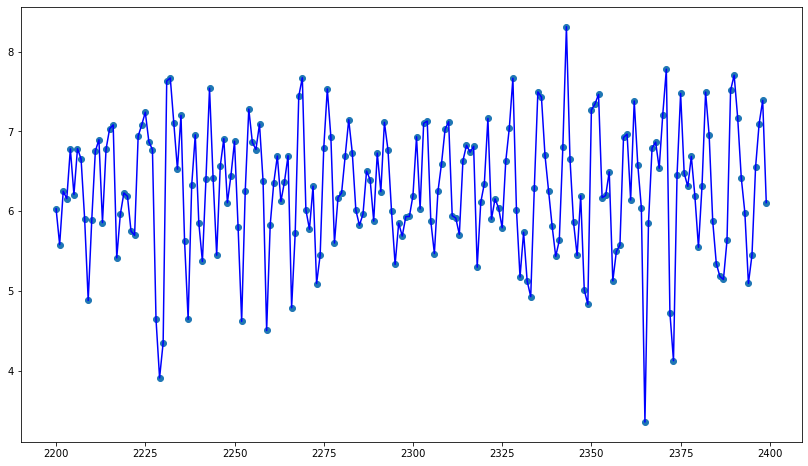

In [297]:
plt.figure(figsize=(14, 8))
plt.plot(np.arange(2200, 2400), sim[2200:2400], 'o')
plt.plot(np.arange(2200, 2400), sim[2200:2400], 'b')
plt.show()

In [298]:
TT = test_dfs[0]['value']

In [312]:
import DAMP_V2
reload(DAMP_V2)
from DAMP_V2 import DAMP_V2

In [315]:
damp1 = DAMP_V2({"lookahead": 1000, "enable_output": True})
scor1, pos1, left_MP1 = damp1.DAMP_2_0(TT, 20, 2000)

-----------------------------------------------
Thank you for using DAMP.
This is version 2.0 of DAMP, please email Eamonn Keogh (eamonn@cs.ucr.edu) or Yue Lu (ylu175@ucr.edu) to make sure you have the latest version.
This time series is of length 13249, and the subsequence length is 20
The lookahead modified from 1000 to the next power of 2: 1024.
Hints:
Usually, the subsequence length you should use is between about 50 to 90% of a typical period.
A good initial value of lookahead is about 2^nearest_power_of_two(16 times S).
The range of lookahead should be 0 to length(T)-location_to_start_processing.
If speed is important, you can tune lookahead to get greater speed-up in your domain.
A simple search, doubling and halving the current value,
 should let you quickly converge on a good value.
------------------------------------------


Results:
DAMP_V2 run time 0:13:09.996897
Pruning Rate: 0.6956366874443455
Predicted discord score/position: 4.037910347804943 / [2969]


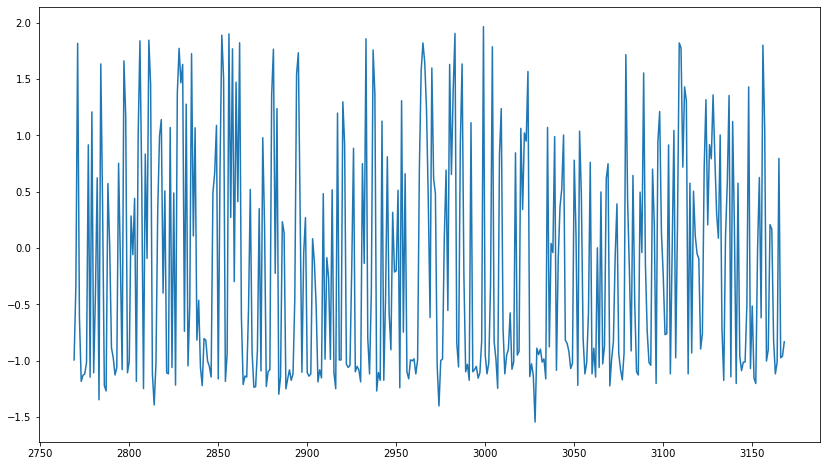

In [323]:
plt.figure(figsize=(14, 8))
plt.plot(np.arange(pos1[0]-200, pos1[0]+200), TT[pos1[0]-200:pos1[0]+200])
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(np.arange(pos1-200, pos1+200), left_MP1[pos1-200:pos1+200])
plt.show()

In [303]:
scor, pos, left_MP = damp.DAMP_2_0(TT, 20, 10000)

-----------------------------------------------
Thank you for using DAMP.
This is version 2.0 of DAMP, please email Eamonn Keogh (eamonn@cs.ucr.edu) or Yue Lu (ylu175@ucr.edu) to make sure you have the latest version.
This time series is of length 13249, and the subsequence length is 20
The lookahead modified from 1024 to the next power of 2: 1024.
Hints:
Usually, the subsequence length you should use is between about 50 to 90% of a typical period.
A good initial value of lookahead is about 2^nearest_power_of_two(16 times S).
The range of lookahead should be 0 to length(T)-location_to_start_processing.
If speed is important, you can tune lookahead to get greater speed-up in your domain.
A simple search, doubling and halving the current value,
 should let you quickly converge on a good value.
------------------------------------------


Results:
DAMP_V2 run time 0:16:41.871480
Pruning Rate: 0.4501547987616099
Predicted discord score/position: 3.7305603582478533 / [11557]


In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(np.arange(pos-200, pos+200), TT[pos-200:pos+200])
plt.show()

In [319]:
plt.figure(figsize=(14, 8))
plt.plot(np.arange(pos-200, pos+200), left_MP[pos-200:pos+200])
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

<Figure size 1008x576 with 0 Axes>

In [314]:
damp3 = DAMP_V2({"lookahead": 1000, "enable_output": True})
scor3, pos3, left_MP3 = damp3.DAMP_2_0(TT, 20, 12000)

-----------------------------------------------
Thank you for using DAMP.
This is version 2.0 of DAMP, please email Eamonn Keogh (eamonn@cs.ucr.edu) or Yue Lu (ylu175@ucr.edu) to make sure you have the latest version.
This time series is of length 13249, and the subsequence length is 20
The lookahead modified from 1000 to the next power of 2: 1024.
Hints:
Usually, the subsequence length you should use is between about 50 to 90% of a typical period.
A good initial value of lookahead is about 2^nearest_power_of_two(16 times S).
The range of lookahead should be 0 to length(T)-location_to_start_processing.
If speed is important, you can tune lookahead to get greater speed-up in your domain.
A simple search, doubling and halving the current value,
 should let you quickly converge on a good value.
------------------------------------------


Results:
DAMP_V2 run time 0:14:22.566749
Pruning Rate: 0.2731707317073171
Predicted discord score/position: 3.5489145646968137 / [12618]


In [316]:
damp4 = DAMP_V2({"lookahead": 1000, "enable_output": True})
scor4, pos4, left_MP4 = damp4.DAMP_2_0(TT, 20, 7000)

-----------------------------------------------
Thank you for using DAMP.
This is version 2.0 of DAMP, please email Eamonn Keogh (eamonn@cs.ucr.edu) or Yue Lu (ylu175@ucr.edu) to make sure you have the latest version.
This time series is of length 13249, and the subsequence length is 20
The lookahead modified from 1000 to the next power of 2: 1024.
Hints:
Usually, the subsequence length you should use is between about 50 to 90% of a typical period.
A good initial value of lookahead is about 2^nearest_power_of_two(16 times S).
The range of lookahead should be 0 to length(T)-location_to_start_processing.
If speed is important, you can tune lookahead to get greater speed-up in your domain.
A simple search, doubling and halving the current value,
 should let you quickly converge on a good value.
------------------------------------------


Results:
DAMP_V2 run time 0:21:18.466908
Pruning Rate: 0.515569823434992
Predicted discord score/position: 3.7999497376908367 / [8767]


In [109]:
len(left_MP)

2888

In [110]:
max(left_MP)

4.825567862541175

In [111]:
max_mp = np.where(left_MP == max(left_MP))
print(max_mp[0])

[161]


In [112]:
left_MP[161]

4.825567862541175

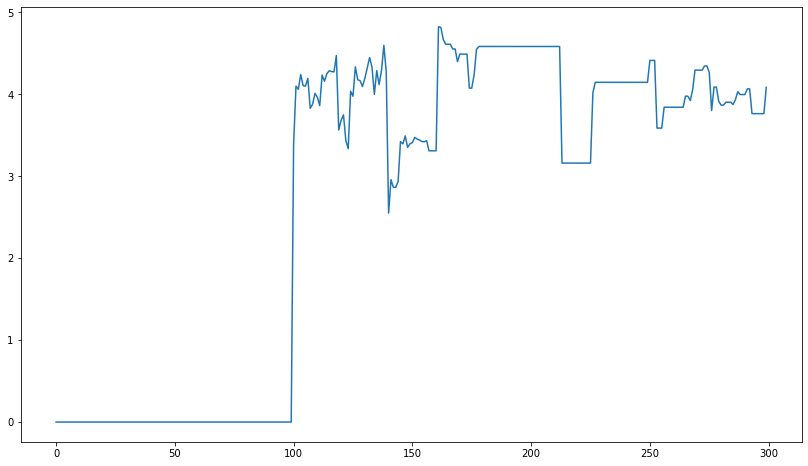

In [114]:
plt.figure(figsize=(14, 8))
plt.plot(np.arange(0, 300), left_MP[:300])
plt.show()

In [115]:
maxa = np.where(left_MP > 4.6)
print(maxa)

(array([ 161,  162,  163,  164,  165,  166,  764, 1117, 1118, 2518],
      dtype=int64),)


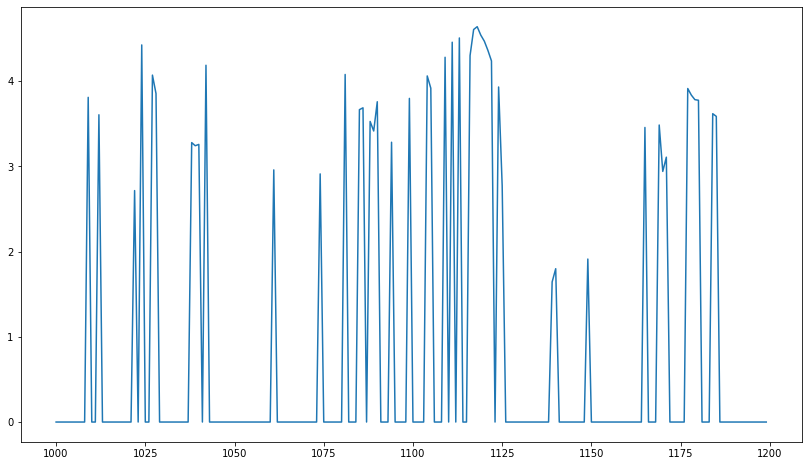

In [118]:
plt.figure(figsize=(14, 8))
plt.plot(np.arange(1000, 1200), left_MP[1000:1200])
plt.show()

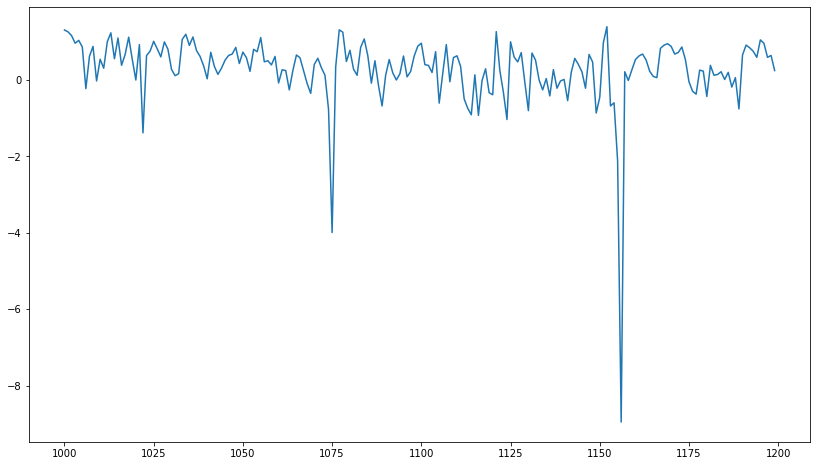

In [119]:
plt.figure(figsize=(14, 8))
plt.plot(np.arange(1000, 1200), TT[1000:1200])
plt.show()

In [413]:
zz = np.zeros(4)
yy = zz.copy()

In [418]:
yy[2:4] = 4

In [419]:
yy

array([0., 0., 4., 4.])

In [157]:
rng = pd.date_range('1/1/2023 00:00:00', periods=122, freq='1s')

In [158]:
rng

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 00:00:01',
               '2023-01-01 00:00:02', '2023-01-01 00:00:03',
               '2023-01-01 00:00:04', '2023-01-01 00:00:05',
               '2023-01-01 00:00:06', '2023-01-01 00:00:07',
               '2023-01-01 00:00:08', '2023-01-01 00:00:09',
               ...
               '2023-01-01 00:01:52', '2023-01-01 00:01:53',
               '2023-01-01 00:01:54', '2023-01-01 00:01:55',
               '2023-01-01 00:01:56', '2023-01-01 00:01:57',
               '2023-01-01 00:01:58', '2023-01-01 00:01:59',
               '2023-01-01 00:02:00', '2023-01-01 00:02:01'],
              dtype='datetime64[ns]', length=122, freq='S')

In [159]:
rng.floor('1min')

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 00:00:00',
               '2023-01-01 00:00:00', '2023-01-01 00:00:00',
               '2023-01-01 00:00:00', '2023-01-01 00:00:00',
               '2023-01-01 00:00:00', '2023-01-01 00:00:00',
               '2023-01-01 00:00:00', '2023-01-01 00:00:00',
               ...
               '2023-01-01 00:01:00', '2023-01-01 00:01:00',
               '2023-01-01 00:01:00', '2023-01-01 00:01:00',
               '2023-01-01 00:01:00', '2023-01-01 00:01:00',
               '2023-01-01 00:01:00', '2023-01-01 00:01:00',
               '2023-01-01 00:02:00', '2023-01-01 00:02:00'],
              dtype='datetime64[ns]', length=122, freq=None)

In [328]:
from scipy import signal
from scipy.signal import find_peaks

In [348]:
def xcorr(ts, max_lag=3000):
    corr = signal.correlate(ts, ts, mode="full")
    lags = signal.correlation_lags(max_lag, max_lag, mode="full")
    return corr, lags

In [391]:
def find_max_peak_index(autocor, lags):
    idx = find_peaks(autocor)[0]
    new_corr = np.take(autocor, idx)
    i = np.argmax(new_corr)
    j = idx[i]
    return lags[j]

In [343]:
2*len(TT)

26498

In [394]:
corr, lag = xcorr(TT)

In [395]:
print(len(corr))
print(len(lag))

26497
5999


In [406]:
corr[len(TT)-3]

-302.4702356283965

In [392]:
corr

array([-2.87287294, -1.69599433,  5.06407926, ...,  5.06407926,
       -1.69599433, -2.87287294])

In [410]:
kk = np.corrcoef(TT, TT)
print(np.max(kk))

1.0


In [408]:
TT

0        1.952409
1        1.074625
2       -0.856609
3        1.027295
4        0.832505
           ...   
13244    0.433680
13245    1.401911
13246    1.980515
13247   -0.058767
13248   -1.471451
Name: value, Length: 13249, dtype: float64

In [393]:
find_max_peak_index(corr[3010:4001], lag[3010:4001])

398

In [354]:
lag[3000:3011]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [341]:
corr[2998:3002]

array([ -97.11039964,  -11.99811549,  -95.6456749 , -173.81098317])

In [360]:
corr_s = corr[3010:4001]

In [359]:
idx = find_max_peak_index(corr_s)

In [385]:
new_corr = np.take(corr_s, idx[0])
print(len(new_corr))
print(len(idx[0]))

288
288


In [386]:
np.argmax(new_corr)

106

In [387]:
idx[0][106]

387

In [389]:
corr_s[380:395]

array([  -7.65120102,  -77.77450709,  -49.02780922,  -49.06664375,
       -115.40926664, -144.53149682,  -76.95855061,  156.60779089,
         -6.99363132,   -5.67394997,  -79.85209917,  -28.1578632 ,
        -95.30584222,   16.08539082,   54.86963354])

In [390]:
corr_s[387]

156.60779088558968

In [326]:
TT

0        1.952409
1        1.074625
2       -0.856609
3        1.027295
4        0.832505
           ...   
13244    0.433680
13245    1.401911
13246    1.980515
13247   -0.058767
13248   -1.471451
Name: value, Length: 13249, dtype: float64

In [448]:
import DAMP_topK
reload(DAMP_topK)
from DAMP_topK import DAMP_topK

In [442]:
damp_topk = DAMP_topK(enable_print=True)

In [443]:
scores0, positions0, left_MP0 = damp_topk.DAMP_k(TT, 10)

Auto subsequence length set to 398.
Starting from index 1001, with lookahead of 1024
Prefix handled starting.
left_MP iteration 1001 out of 7369
left_MP iteration 1002 out of 7369
left_MP iteration 1500 out of 7369
left_MP iteration 2000 out of 7369
left_MP iteration 2500 out of 7369
left_MP iteration 3000 out of 7369
left_MP iteration 3500 out of 7369
left_MP iteration 4000 out of 7369
left_MP iteration 4500 out of 7369
left_MP iteration 5000 out of 7369
left_MP iteration 5500 out of 7369
left_MP iteration 6000 out of 7369
left_MP iteration 6500 out of 7369
left_MP iteration 7000 out of 7369
Prefix part 1 done.
Prefix iteration k discord 0.
Prefix iteration k discord 1.
Prefix iteration k discord 2.
Prefix iteration k discord 3.
Prefix iteration k discord 4.
Prefix iteration k discord 5.
Prefix iteration k discord 6.
Prefix iteration k discord 7.
Prefix iteration k discord 8.
Prefix iteration k discord 9.
Prefix has been handled.
iteration 7370 out of 12851
iteration 7371 out of 12851

iteration 7629 out of 12851
iteration 7630 out of 12851
iteration 7631 out of 12851
iteration 7632 out of 12851
iteration 7633 out of 12851
iteration 7634 out of 12851
iteration 7635 out of 12851
iteration 7636 out of 12851
iteration 7637 out of 12851
iteration 7638 out of 12851
iteration 7639 out of 12851
iteration 7640 out of 12851
iteration 7641 out of 12851
iteration 7642 out of 12851
iteration 7643 out of 12851
iteration 7644 out of 12851
iteration 7645 out of 12851
iteration 7646 out of 12851
iteration 7647 out of 12851
iteration 7648 out of 12851
iteration 7649 out of 12851
iteration 7650 out of 12851
iteration 7651 out of 12851
iteration 7652 out of 12851
iteration 7653 out of 12851
iteration 7654 out of 12851
iteration 7655 out of 12851
iteration 7656 out of 12851
iteration 7657 out of 12851
iteration 7658 out of 12851
iteration 7659 out of 12851
iteration 7660 out of 12851
iteration 7661 out of 12851
iteration 7662 out of 12851
iteration 7663 out of 12851
iteration 7664 out o

iteration 7922 out of 12851
iteration 7923 out of 12851
iteration 7924 out of 12851
iteration 7925 out of 12851
iteration 7926 out of 12851
iteration 7927 out of 12851
iteration 7928 out of 12851
iteration 7929 out of 12851
iteration 7930 out of 12851
iteration 7931 out of 12851
iteration 7932 out of 12851
iteration 7933 out of 12851
iteration 7934 out of 12851
iteration 7935 out of 12851
iteration 7936 out of 12851
iteration 7937 out of 12851
iteration 7938 out of 12851
iteration 7939 out of 12851
iteration 7940 out of 12851
iteration 7941 out of 12851
iteration 7942 out of 12851
iteration 7943 out of 12851
iteration 7944 out of 12851
iteration 7945 out of 12851
iteration 7946 out of 12851
iteration 7947 out of 12851
iteration 7948 out of 12851
iteration 7949 out of 12851
iteration 7950 out of 12851
iteration 7951 out of 12851
iteration 7952 out of 12851
iteration 7953 out of 12851
iteration 7954 out of 12851
iteration 7955 out of 12851
iteration 7956 out of 12851
iteration 7957 out o

iteration 8219 out of 12851
iteration 8220 out of 12851
iteration 8221 out of 12851
iteration 8222 out of 12851
iteration 8223 out of 12851
iteration 8224 out of 12851
iteration 8225 out of 12851
iteration 8226 out of 12851
iteration 8227 out of 12851
iteration 8228 out of 12851
iteration 8229 out of 12851
iteration 8230 out of 12851
iteration 8231 out of 12851
iteration 8232 out of 12851
iteration 8233 out of 12851
iteration 8234 out of 12851
iteration 8235 out of 12851
iteration 8236 out of 12851
iteration 8237 out of 12851
iteration 8238 out of 12851
iteration 8239 out of 12851
iteration 8240 out of 12851
iteration 8241 out of 12851
iteration 8242 out of 12851
iteration 8243 out of 12851
iteration 8244 out of 12851
iteration 8245 out of 12851
iteration 8246 out of 12851
iteration 8247 out of 12851
iteration 8248 out of 12851
iteration 8249 out of 12851
iteration 8250 out of 12851
iteration 8251 out of 12851
iteration 8252 out of 12851
iteration 8253 out of 12851
iteration 8254 out o

iteration 8512 out of 12851
iteration 8513 out of 12851
iteration 8514 out of 12851
iteration 8515 out of 12851
iteration 8516 out of 12851
iteration 8517 out of 12851
iteration 8518 out of 12851
iteration 8519 out of 12851
iteration 8520 out of 12851
iteration 8521 out of 12851
iteration 8522 out of 12851
iteration 8523 out of 12851
iteration 8524 out of 12851
iteration 8525 out of 12851
iteration 8526 out of 12851
iteration 8527 out of 12851
iteration 8528 out of 12851
iteration 8529 out of 12851
iteration 8530 out of 12851
iteration 8531 out of 12851
iteration 8532 out of 12851
iteration 8533 out of 12851
iteration 8534 out of 12851
iteration 8535 out of 12851
iteration 8536 out of 12851
iteration 8537 out of 12851
iteration 8538 out of 12851
iteration 8539 out of 12851
iteration 8540 out of 12851
iteration 8541 out of 12851
iteration 8542 out of 12851
iteration 8543 out of 12851
iteration 8544 out of 12851
iteration 8545 out of 12851
iteration 8546 out of 12851
iteration 8547 out o

iteration 8805 out of 12851
iteration 8806 out of 12851
iteration 8807 out of 12851
iteration 8808 out of 12851
iteration 8809 out of 12851
iteration 8810 out of 12851
iteration 8811 out of 12851
iteration 8812 out of 12851
iteration 8813 out of 12851
iteration 8814 out of 12851
iteration 8815 out of 12851
iteration 8816 out of 12851
iteration 8817 out of 12851
iteration 8818 out of 12851
iteration 8819 out of 12851
iteration 8820 out of 12851
iteration 8821 out of 12851
iteration 8822 out of 12851
iteration 8823 out of 12851
iteration 8824 out of 12851
iteration 8825 out of 12851
iteration 8826 out of 12851
iteration 8827 out of 12851
iteration 8828 out of 12851
iteration 8829 out of 12851
iteration 8830 out of 12851
iteration 8831 out of 12851
iteration 8832 out of 12851
iteration 8833 out of 12851
iteration 8834 out of 12851
iteration 8835 out of 12851
iteration 8836 out of 12851
iteration 8837 out of 12851
iteration 8838 out of 12851
iteration 8839 out of 12851
iteration 8840 out o

iteration 9098 out of 12851
iteration 9099 out of 12851
iteration 9100 out of 12851
iteration 9101 out of 12851
iteration 9102 out of 12851
iteration 9103 out of 12851
iteration 9104 out of 12851
iteration 9105 out of 12851
iteration 9106 out of 12851
iteration 9107 out of 12851
iteration 9108 out of 12851
iteration 9109 out of 12851
iteration 9110 out of 12851
iteration 9111 out of 12851
iteration 9112 out of 12851
iteration 9113 out of 12851
iteration 9114 out of 12851
iteration 9115 out of 12851
iteration 9116 out of 12851
iteration 9117 out of 12851
iteration 9118 out of 12851
iteration 9119 out of 12851
iteration 9120 out of 12851
iteration 9121 out of 12851
iteration 9122 out of 12851
iteration 9123 out of 12851
iteration 9124 out of 12851
iteration 9125 out of 12851
iteration 9126 out of 12851
iteration 9127 out of 12851
iteration 9128 out of 12851
iteration 9129 out of 12851
iteration 9130 out of 12851
iteration 9131 out of 12851
iteration 9132 out of 12851
iteration 9133 out o

iteration 9391 out of 12851
iteration 9392 out of 12851
iteration 9393 out of 12851
iteration 9394 out of 12851
iteration 9395 out of 12851
iteration 9396 out of 12851
iteration 9397 out of 12851
iteration 9398 out of 12851
iteration 9399 out of 12851
iteration 9400 out of 12851
iteration 9401 out of 12851
iteration 9402 out of 12851
iteration 9403 out of 12851
iteration 9404 out of 12851
iteration 9405 out of 12851
iteration 9406 out of 12851
iteration 9407 out of 12851
iteration 9408 out of 12851
iteration 9409 out of 12851
iteration 9410 out of 12851
iteration 9411 out of 12851
iteration 9412 out of 12851
iteration 9413 out of 12851
iteration 9414 out of 12851
iteration 9415 out of 12851
iteration 9416 out of 12851
iteration 9417 out of 12851
iteration 9418 out of 12851
iteration 9419 out of 12851
iteration 9420 out of 12851
iteration 9421 out of 12851
iteration 9422 out of 12851
iteration 9423 out of 12851
iteration 9424 out of 12851
iteration 9425 out of 12851
iteration 9426 out o

iteration 9702 out of 12851
iteration 9703 out of 12851
iteration 9704 out of 12851
iteration 9705 out of 12851
iteration 9706 out of 12851
iteration 9707 out of 12851
iteration 9708 out of 12851
iteration 9709 out of 12851
iteration 9710 out of 12851
iteration 9711 out of 12851
iteration 9712 out of 12851
iteration 9713 out of 12851
iteration 9714 out of 12851
iteration 9715 out of 12851
iteration 9716 out of 12851
iteration 9717 out of 12851
iteration 9718 out of 12851
iteration 9719 out of 12851
iteration 9720 out of 12851
iteration 9721 out of 12851
iteration 9722 out of 12851
iteration 9723 out of 12851
iteration 9724 out of 12851
iteration 9725 out of 12851
iteration 9726 out of 12851
iteration 9727 out of 12851
iteration 9728 out of 12851
iteration 9729 out of 12851
iteration 9730 out of 12851
iteration 9731 out of 12851
iteration 9732 out of 12851
iteration 9733 out of 12851
iteration 9734 out of 12851
iteration 9735 out of 12851
iteration 9736 out of 12851
iteration 9737 out o

iteration 9997 out of 12851
iteration 9998 out of 12851
iteration 9999 out of 12851
iteration 10000 out of 12851
iteration 10001 out of 12851
iteration 10002 out of 12851
iteration 10003 out of 12851
iteration 10004 out of 12851
iteration 10005 out of 12851
iteration 10006 out of 12851
iteration 10007 out of 12851
iteration 10008 out of 12851
iteration 10009 out of 12851
iteration 10010 out of 12851
iteration 10011 out of 12851
iteration 10012 out of 12851
iteration 10013 out of 12851
iteration 10014 out of 12851
iteration 10015 out of 12851
iteration 10016 out of 12851
iteration 10017 out of 12851
iteration 10018 out of 12851
iteration 10019 out of 12851
iteration 10020 out of 12851
iteration 10021 out of 12851
iteration 10022 out of 12851
iteration 10023 out of 12851
iteration 10024 out of 12851
iteration 10025 out of 12851
iteration 10026 out of 12851
iteration 10027 out of 12851
iteration 10028 out of 12851
iteration 10029 out of 12851
iteration 10030 out of 12851
iteration 10031 o

iteration 10292 out of 12851
iteration 10293 out of 12851
iteration 10294 out of 12851
iteration 10295 out of 12851
iteration 10296 out of 12851
iteration 10297 out of 12851
iteration 10298 out of 12851
iteration 10299 out of 12851
iteration 10300 out of 12851
iteration 10301 out of 12851
iteration 10302 out of 12851
iteration 10303 out of 12851
iteration 10304 out of 12851
iteration 10305 out of 12851
iteration 10306 out of 12851
iteration 10307 out of 12851
iteration 10308 out of 12851
iteration 10309 out of 12851
iteration 10310 out of 12851
iteration 10311 out of 12851
iteration 10312 out of 12851
iteration 10313 out of 12851
iteration 10314 out of 12851
iteration 10315 out of 12851
iteration 10316 out of 12851
iteration 10317 out of 12851
iteration 10318 out of 12851
iteration 10319 out of 12851
iteration 10320 out of 12851
iteration 10321 out of 12851
iteration 10322 out of 12851
iteration 10323 out of 12851
iteration 10324 out of 12851
iteration 10325 out of 12851
iteration 1032

iteration 10594 out of 12851
iteration 10595 out of 12851
iteration 10596 out of 12851
iteration 10597 out of 12851
iteration 10598 out of 12851
iteration 10599 out of 12851
iteration 10600 out of 12851
iteration 10601 out of 12851
iteration 10602 out of 12851
iteration 10603 out of 12851
iteration 10604 out of 12851
iteration 10605 out of 12851
iteration 10606 out of 12851
iteration 10607 out of 12851
iteration 10608 out of 12851
iteration 10609 out of 12851
iteration 10610 out of 12851
iteration 10611 out of 12851
iteration 10612 out of 12851
iteration 10613 out of 12851
iteration 10614 out of 12851
iteration 10615 out of 12851
iteration 10616 out of 12851
iteration 10617 out of 12851
iteration 10618 out of 12851
iteration 10619 out of 12851
iteration 10620 out of 12851
iteration 10621 out of 12851
iteration 10622 out of 12851
iteration 10623 out of 12851
iteration 10624 out of 12851
iteration 10625 out of 12851
iteration 10626 out of 12851
iteration 10627 out of 12851
iteration 1062

iteration 10877 out of 12851
iteration 10878 out of 12851
iteration 10879 out of 12851
iteration 10880 out of 12851
iteration 10881 out of 12851
iteration 10882 out of 12851
iteration 10883 out of 12851
iteration 10884 out of 12851
iteration 10885 out of 12851
iteration 10886 out of 12851
iteration 10887 out of 12851
iteration 10888 out of 12851
iteration 10889 out of 12851
iteration 10890 out of 12851
iteration 10891 out of 12851
iteration 10892 out of 12851
iteration 10893 out of 12851
iteration 10894 out of 12851
iteration 10895 out of 12851
iteration 10896 out of 12851
iteration 10897 out of 12851
iteration 10898 out of 12851
iteration 10899 out of 12851
iteration 10900 out of 12851
iteration 10901 out of 12851
iteration 10902 out of 12851
iteration 10903 out of 12851
iteration 10904 out of 12851
iteration 10905 out of 12851
iteration 10906 out of 12851
iteration 10907 out of 12851
iteration 10908 out of 12851
iteration 10909 out of 12851
iteration 10910 out of 12851
iteration 1091

iteration 11160 out of 12851
iteration 11161 out of 12851
iteration 11162 out of 12851
iteration 11163 out of 12851
iteration 11164 out of 12851
iteration 11165 out of 12851
iteration 11166 out of 12851
iteration 11167 out of 12851
iteration 11168 out of 12851
iteration 11169 out of 12851
iteration 11170 out of 12851
iteration 11171 out of 12851
iteration 11172 out of 12851
iteration 11173 out of 12851
iteration 11174 out of 12851
iteration 11175 out of 12851
iteration 11176 out of 12851
iteration 11177 out of 12851
iteration 11178 out of 12851
iteration 11179 out of 12851
iteration 11180 out of 12851
iteration 11181 out of 12851
iteration 11182 out of 12851
iteration 11183 out of 12851
iteration 11184 out of 12851
iteration 11185 out of 12851
iteration 11186 out of 12851
iteration 11187 out of 12851
iteration 11188 out of 12851
iteration 11189 out of 12851
iteration 11190 out of 12851
iteration 11191 out of 12851
iteration 11192 out of 12851
iteration 11193 out of 12851
iteration 1119

iteration 11474 out of 12851
iteration 11475 out of 12851
iteration 11476 out of 12851
iteration 11477 out of 12851
iteration 11478 out of 12851
iteration 11479 out of 12851
iteration 11480 out of 12851
iteration 11481 out of 12851
iteration 11482 out of 12851
iteration 11483 out of 12851
iteration 11484 out of 12851
iteration 11485 out of 12851
iteration 11486 out of 12851
iteration 11487 out of 12851
iteration 11488 out of 12851
iteration 11489 out of 12851
iteration 11490 out of 12851
iteration 11491 out of 12851
iteration 11492 out of 12851
iteration 11493 out of 12851
iteration 11494 out of 12851
iteration 11495 out of 12851
iteration 11496 out of 12851
iteration 11497 out of 12851
iteration 11498 out of 12851
iteration 11499 out of 12851
iteration 11500 out of 12851
iteration 11501 out of 12851
iteration 11502 out of 12851
iteration 11503 out of 12851
iteration 11504 out of 12851
iteration 11505 out of 12851
iteration 11506 out of 12851
iteration 11507 out of 12851
iteration 1150

iteration 11757 out of 12851
iteration 11758 out of 12851
iteration 11759 out of 12851
iteration 11760 out of 12851
iteration 11761 out of 12851
iteration 11762 out of 12851
iteration 11763 out of 12851
iteration 11764 out of 12851
iteration 11765 out of 12851
iteration 11766 out of 12851
iteration 11767 out of 12851
iteration 11768 out of 12851
iteration 11769 out of 12851
iteration 11770 out of 12851
iteration 11771 out of 12851
iteration 11772 out of 12851
iteration 11773 out of 12851
iteration 11774 out of 12851
iteration 11775 out of 12851
iteration 11776 out of 12851
iteration 11777 out of 12851
iteration 11778 out of 12851
iteration 11779 out of 12851
iteration 11780 out of 12851
iteration 11781 out of 12851
iteration 11782 out of 12851
iteration 11783 out of 12851
iteration 11784 out of 12851
iteration 11785 out of 12851
iteration 11786 out of 12851
iteration 11787 out of 12851
iteration 11788 out of 12851
iteration 11789 out of 12851
iteration 11790 out of 12851
iteration 1179

iteration 12040 out of 12851
iteration 12041 out of 12851
iteration 12042 out of 12851
iteration 12043 out of 12851
iteration 12044 out of 12851
iteration 12045 out of 12851
iteration 12046 out of 12851
iteration 12047 out of 12851
iteration 12048 out of 12851
iteration 12049 out of 12851
iteration 12050 out of 12851
iteration 12051 out of 12851
iteration 12052 out of 12851
iteration 12053 out of 12851
iteration 12054 out of 12851
iteration 12055 out of 12851
iteration 12056 out of 12851
iteration 12057 out of 12851
iteration 12058 out of 12851
iteration 12059 out of 12851
iteration 12060 out of 12851
iteration 12061 out of 12851
iteration 12062 out of 12851
iteration 12063 out of 12851
iteration 12064 out of 12851
iteration 12065 out of 12851
iteration 12066 out of 12851
iteration 12067 out of 12851
iteration 12068 out of 12851
iteration 12069 out of 12851
iteration 12070 out of 12851
iteration 12071 out of 12851
iteration 12072 out of 12851
iteration 12073 out of 12851
iteration 1207

iteration 12327 out of 12851
iteration 12328 out of 12851
iteration 12329 out of 12851
iteration 12330 out of 12851
iteration 12331 out of 12851
iteration 12332 out of 12851
iteration 12333 out of 12851
iteration 12334 out of 12851
iteration 12335 out of 12851
iteration 12336 out of 12851
iteration 12337 out of 12851
iteration 12338 out of 12851
iteration 12339 out of 12851
iteration 12340 out of 12851
iteration 12341 out of 12851
iteration 12342 out of 12851
iteration 12343 out of 12851
iteration 12344 out of 12851
iteration 12345 out of 12851
iteration 12346 out of 12851
iteration 12347 out of 12851
iteration 12348 out of 12851
iteration 12349 out of 12851
iteration 12350 out of 12851
iteration 12351 out of 12851
iteration 12352 out of 12851
iteration 12353 out of 12851
iteration 12354 out of 12851
iteration 12355 out of 12851
iteration 12356 out of 12851
iteration 12357 out of 12851
iteration 12358 out of 12851
iteration 12359 out of 12851
iteration 12360 out of 12851
iteration 1236

iteration 12640 out of 12851
iteration 12641 out of 12851
iteration 12642 out of 12851
iteration 12643 out of 12851
iteration 12644 out of 12851
iteration 12645 out of 12851
iteration 12646 out of 12851
iteration 12647 out of 12851
iteration 12648 out of 12851
iteration 12649 out of 12851
iteration 12650 out of 12851
iteration 12651 out of 12851
iteration 12652 out of 12851
iteration 12653 out of 12851
iteration 12654 out of 12851
iteration 12655 out of 12851
iteration 12656 out of 12851
iteration 12657 out of 12851
iteration 12658 out of 12851
iteration 12659 out of 12851
iteration 12660 out of 12851
iteration 12661 out of 12851
iteration 12662 out of 12851
iteration 12663 out of 12851
iteration 12664 out of 12851
iteration 12665 out of 12851
iteration 12666 out of 12851
iteration 12667 out of 12851
iteration 12668 out of 12851
iteration 12669 out of 12851
iteration 12670 out of 12851
iteration 12671 out of 12851
iteration 12672 out of 12851
iteration 12673 out of 12851
iteration 1267

([26.180235792549464,
  26.143797747395443,
  26.105554420613487,
  26.068637894538707,
  25.981898325957484,
  25.9711163543283,
  25.955847969896386,
  25.95315337460674,
  25.92996475248768,
  25.868638612395994],
 [2485, 1373, 1049, 1999, 4169, 2280, 5414, 4694, 6107, 7344],
 array([0., 0., 0., ..., 0., 0., 0.]))

In [445]:
test_dfs[0]

,time,RUN_START_WW,Equip,series,key,value
0,2022-06-26 23:45:00,202227,Equip2000,Feature2_mean,Equip2000_Feature2_mean,1.952409
1,2022-06-27 00:00:00,202227,Equip2000,Feature2_mean,Equip2000_Feature2_mean,1.074625
2,2022-06-27 00:15:00,202227,Equip2000,Feature2_mean,Equip2000_Feature2_mean,-0.856609
3,2022-06-27 00:30:00,202227,Equip2000,Feature2_mean,Equip2000_Feature2_mean,1.027295
4,2022-06-27 00:45:00,202227,Equip2000,Feature2_mean,Equip2000_Feature2_mean,0.832505
...,...,...,...,...,...,...
13244,2022-11-24 01:30:00,202248,Equip2000,Feature2_mean,Equip2000_Feature2_mean,0.433680
13245,2022-11-24 01:45:00,202248,Equip2000,Feature2_mean,Equip2000_Feature2_mean,1.401911
13246,2022-11-24 02:00:00,202248,Equip2000,Feature2_mean,Equip2000_Feature2_mean,1.980515
13247,2022-11-24 02:15:00,202248,Equip2000,Feature2_mean,Equip2000_Feature2_mean,-0.058767


In [446]:
test_dfs[0].to_excel('..//..//sample_data_file_ramp_DAMP_topK0 EQUIP2000.xlsx', engine='xlsxwriter')

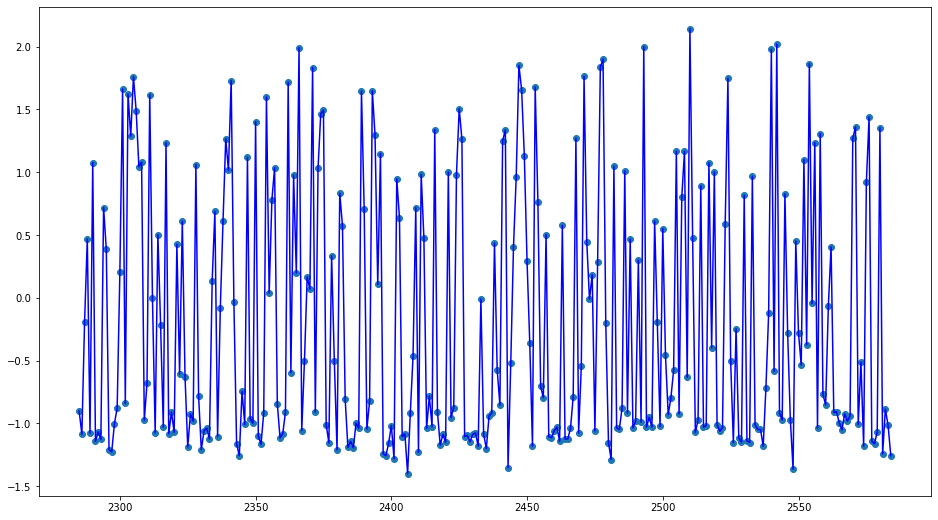

In [447]:
cord_idx = 2485
s = cord_idx - 200
e = cord_idx + 100
plt.figure(figsize=(16, 9))
plt.plot(np.arange(s, e), TT[s:e], 'o')
plt.plot(np.arange(s, e), TT[s:e], 'b')
plt.show()

In [457]:
import DAMP_topK
reload(DAMP_topK)
from DAMP_topK import DAMP_topK

In [454]:
damp_topk1 = DAMP_topK(enable_print=True)

In [456]:
scores1, positions1, left_MP1 = damp_topk1.DAMP_k(test_dfs[1]['value'], discords_num=10)

Auto subsequence length set to 97.
Starting from index 1001, with lookahead of 256
left_MP iteration 1001 out of 2553
DAMP_topK run time 0:37:02.878264
Pruning Rate: 0.16898033382911914
Predicted discord score/position (top 0): 11.99179569253806/1095
Predicted discord score/position (top 1): 11.965376889230388/1001
Predicted discord score/position (top 2): 11.949445264661604/1184
Predicted discord score/position (top 3): 11.76381975031724/2720
Predicted discord score/position (top 4): 11.75724385240849/3191
Predicted discord score/position (top 5): 11.702842643428626/2611
Predicted discord score/position (top 6): 11.629559530630107/2961
Predicted discord score/position (top 7): 11.622437667899115/3935
Predicted discord score/position (top 8): 11.609378359689213/3815
Predicted discord score/position (top 9): 11.605365604222737/5972


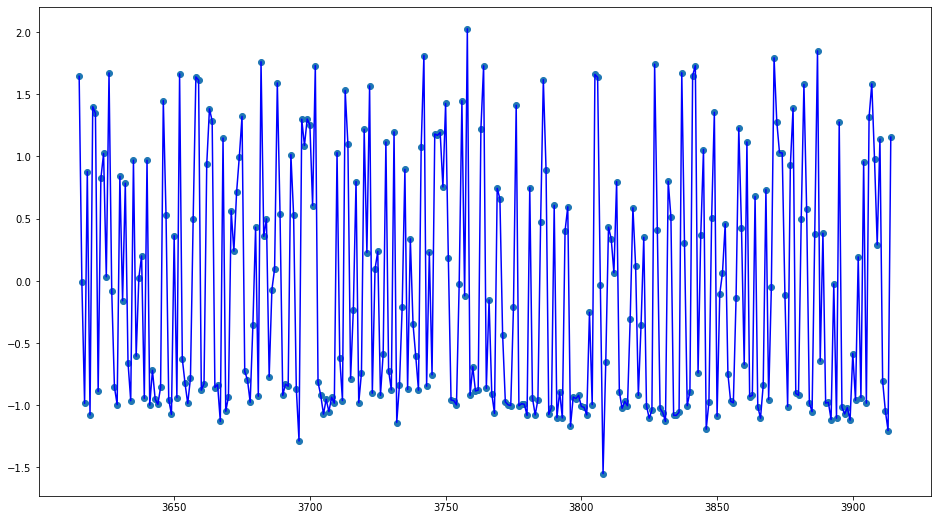

In [462]:
cord_idx = 3815
w = 200
s = cord_idx - w
e = cord_idx + int(0.5*w)
plt.figure(figsize=(16, 9))
plt.plot(np.arange(s, e), test_dfs[1]['value'][s:e], 'o')
plt.plot(np.arange(s, e), test_dfs[1]['value'][s:e], 'b')
plt.show()

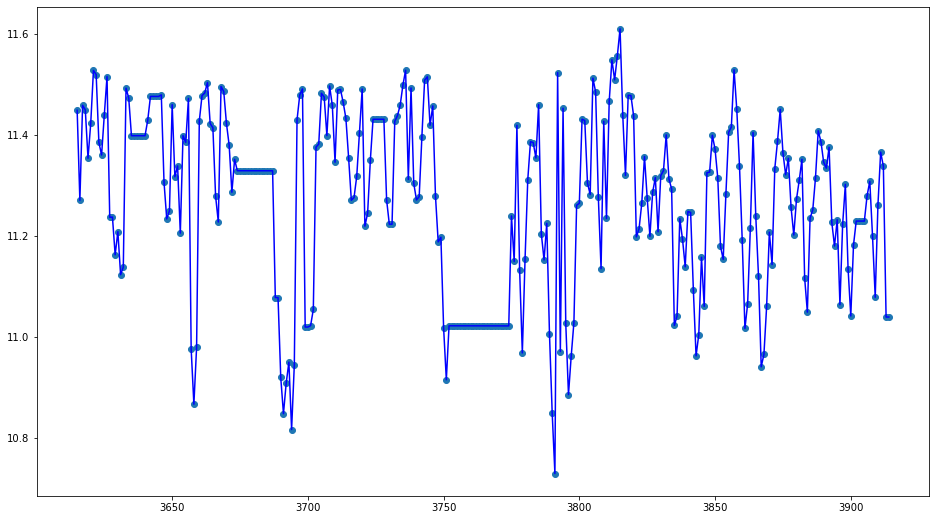

In [464]:
cord_idx = 3815
w = 200
s = cord_idx - w
e = cord_idx + int(0.5*w)
plt.figure(figsize=(16, 9))
plt.plot(np.arange(s, e), left_MP1[s:e], 'o')
plt.plot(np.arange(s, e), left_MP1[s:e], 'b')
plt.show()

In [465]:
test_dfs[1].to_excel('..//..//sample_data_file_ramp_DAMP_topK1 EQUIP2000.xlsx', engine='xlsxwriter')

In [468]:
left_mp_df = pd.DataFrame(data=left_MP1, columns=['Left_MP'])
left_mp_df.to_excel('..//..//Left_MP of sample_data_file_ramp_DAMP_topK1 EQUIP2000.xlsx', engine='xlsxwriter')

In [470]:
type(left_MP1)

numpy.ndarray

In [557]:
import HOT_SAX
reload(HOT_SAX)
from HOT_SAX import HOT_SAX

In [558]:
hot_sax_search = HOT_SAX(TT[:2000].to_numpy())

In [493]:
TT

0        1.952409
1        1.074625
2       -0.856609
3        1.027295
4        0.832505
           ...   
13244    0.433680
13245    1.401911
13246    1.980515
13247   -0.058767
13248   -1.471451
Name: value, Length: 13249, dtype: float64

In [559]:
hot_sax_search.set_SAX_params(5, 16)

In [560]:
hot_sax_search.init_norm()

In [ ]:
best_dist, best_loc = hot_sax_search.search(print_out=True)

HOT SAX search starting now.
neigh-dist: 0.6661531355476757
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.6661531355476757
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.7692073842599276
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.7692073842599276
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.6661531355476757
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.6661531355476757
neigh-dist: 0.0
neigh-dist: 0.6661531355476757
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.8293611999605479
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.7347924877133679
neigh-dist: 0.6957154590779192
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.9653600364630803
neigh-dist: 0.9359594008289034
neigh-dist: 0.5797413216254297
neigh-dist: 0.5439117575489613
neigh-dist: 0.30870698080866266
neigh-dist: 0.0
neigh-dist: 1.150617225666294
neigh-dist: 1.0844353369380766
neigh-dist: 1.058347768930421
neigh-

neigh-dist: 0.8854377448471462
neigh-dist: 0.6260990336999411
neigh-dist: 0.0
neigh-dist: 0.8854377448471462
neigh-dist: 0.6260990336999411
neigh-dist: 0.43379718763495917
neigh-dist: 0.0
neigh-dist: 0.9653600364630803
neigh-dist: 0.8854377448471462
neigh-dist: 0.6260990336999411
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 1.0391535016541107
neigh-dist: 0.7347924877133679
neigh-dist: 0.6549656479541504
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.7347924877133679
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.6661531355476757
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.3846036921299638
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.5439117575489613
neigh-dist: 0.0
neigh-dist: 0.6661531355476757
neigh-dist: 0.0
neigh-dist: 0.5769055381949457
neigh-dist: 0.5439117575489613
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.5439117575489613
neigh-dist: 0.43


neigh-dist: 0.91419910304047
neigh-dist: 0.3846036921299638
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.7347924877133679
neigh-dist: 0.5439117575489613
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.5439117575489613
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.7595393340703297
neigh-dist: 0.5769055381949457
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.8513636120953255
neigh-dist: 0.6549656479541504
neigh-dist: 0.5769055381949457
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.3846036921299638
neigh-dist: 0.27195587877448063
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.43
neigh-dist: 0.0
neigh-dist: 0.27195587877448063
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.43
neigh-dist: 0.3846036921299638
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.43
neigh-dist: 0.0
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.7692073842599276
neigh-dist: 0.543911757548961

neigh-dist: 0.5439117575489613
neigh-dist: 0.43
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.7692073842599276
neigh-dist: 0.5439117575489613
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.91419910304047
neigh-dist: 0.3846036921299638
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.8854377448471462
neigh-dist: 0.8293611999605479
neigh-dist: 0.7347924877133679
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.7347924877133679
neigh-dist: 0.6260990336999411
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.8293611999605479
neigh-dist: 0.7347924877133679
neigh-dist: 0.6260990336999411
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 1.0391535016541107
neigh-dist: 0.7347924877133679
neigh-dist: 0.6549656479541504
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.6549656479541504
neigh-dist: 0.3846036921299638
neigh-dist: 0.27195587877448063
neigh-dist: 0.0
neigh-dist: 0.5769055381949457
neigh-dist: 0.19230

neigh-dist: 0.8513636120953255
neigh-dist: 0.7347924877133679
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.6081118318204308
neigh-dist: 0.3846036921299638
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.43
neigh-dist: 0.2414953415699773
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.43
neigh-dist: 0.3846036921299638
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.6661531355476757
neigh-dist: 0.5769055381949457
neigh-dist: 0.43
neigh-dist: 0.30870698080866266
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.6933541663536752
neigh-dist: 0.5439117575489613
neigh-dist: 0.43
neigh-dist: 0.30870698080866266
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.5439117575489613
neigh-dist: 0.0
neigh-dist: 0.6661531355476757
neigh-dist: 0.0
neigh-dist: 0.5439117575489613
neigh-dist: 0.0
neigh-dist: 0.0
neigh-dist: 0.5439117575489613
neigh-dist: 0.0
neigh-dist: 0.43
neigh-di

neigh-dist: 0.6661531355476757
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.91419910304047
neigh-dist: 0.7692073842599276
neigh-dist: 0.7347924877133679
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.91419910304047
neigh-dist: 0.6661531355476757
neigh-dist: 0.6260990336999411
neigh-dist: 0.0
neigh-dist: 0.6661531355476757
neigh-dist: 0.6260990336999411
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.5769055381949457
neigh-dist: 0.5439117575489613
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.6933541663536752
neigh-dist: 0.43
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.3846036921299638
neigh-dist: 0.27195587877448063
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.7595393340703297
neigh-dist: 0.6260990336999411
neigh-dist: 0.43
neigh-dist: 0.27195587877448063
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.9262613022252414
neigh-dist: 0.6260990336999411
neigh-dist: 0.1923018460649819
nei

neigh-dist: 0.6260990336999411
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.8293611999605479
neigh-dist: 0.6260990336999411
neigh-dist: 0.5439117575489613
neigh-dist: 0.27195587877448063
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.43
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.43
neigh-dist: 0.27195587877448063
neigh-dist: 0.2414953415699773
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.27195587877448063
neigh-dist: 0.0
neigh-dist: 0.3846036921299638
neigh-dist: 0.3330765677738379
neigh-dist: 0.0
neigh-dist: 0.5769055381949457
neigh-dist: 0.3846036921299638
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.8293611999605479
neigh-dist: 0.6260990336999411
neigh-dist: 0.5439117575489613
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.8293611999605479
neigh-dist: 0.7347924877133679
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.0
neigh-dist: 

neigh-dist: 0.43
neigh-dist: 0.27195587877448063
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.6933541663536752
neigh-dist: 0.43
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.7692073842599276
neigh-dist: 0.3846036921299638
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.5439117575489613
neigh-dist: 0.43
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.9918064327276769
neigh-dist: 0.8293611999605479
neigh-dist: 0.5439117575489613
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.8293611999605479
neigh-dist: 0.7347924877133679
neigh-dist: 0.6661531355476757
neigh-dist: 0.5439117575489613
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.6661531355476757
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.91419910304047
neigh-dist: 0.7692073842599276
neigh-dist: 0.7347924877133679
neigh-dist: 0.3846036921299638


neigh-dist: 0.6661531355476757
neigh-dist: 0.3846036921299638
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.5439117575489613
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.3846036921299638
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.7347924877133679
neigh-dist: 0.6549656479541504
neigh-dist: 0.3846036921299638
neigh-dist: 0.27195587877448063
neigh-dist: 0.0
neigh-dist: 0.8293611999605479
neigh-dist: 0.6549656479541504
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.5439117575489613
neigh-dist: 0.0
neigh-dist: 0.8293611999605479
neigh-dist: 0.6661531355476757
neigh-dist: 0.6260990336999411
neigh-dist: 0.0
neigh-dist: 0.91419910304047
neigh-dist: 0.6661531355476757
neigh-dist: 0.6260990336999411
neigh-dist: 0.0
neigh-dist: 0.6661531355476757
neigh-dist: 0.6260990336999411
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.5439117575489613
neigh-dist: 0.43
neigh-dist: 0.3846

neigh-dist: 0.7595393340703297
neigh-dist: 0.7347924877133679
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.0
neigh-dist: 0.7347924877133679
neigh-dist: 0.0
neigh-dist: 0.8293611999605479
neigh-dist: 0.0
neigh-dist: 0.6661531355476757
neigh-dist: 0.5439117575489613
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.5439117575489613
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.6661531355476757
neigh-dist: 0.5439117575489613
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.7692073842599276
neigh-dist: 0.6661531355476757
neigh-dist: 0.5439117575489613
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.6933541663536752
neigh-dist: 0.6661531355476757
neigh-dist: 0.5951134345652096
neigh-dist: 0.45413654334351905
neigh-dist: 0.2414953415699773
neigh-dist: 0.0
neigh-dist: 0.5769055381949457
neigh-dist: 0.30870698080866266
neigh-dist: 0.0
neigh-dist: 0.5439117575489613
neigh-dist: 0.43
neigh-dist: 0.3846036921299638
neigh-dist: 0.0

neigh-dist: 0.991806432727677
neigh-dist: 0.8293611999605479
neigh-dist: 0.5439117575489613
neigh-dist: 0.43
neigh-dist: 0.0
neigh-dist: 0.8293611999605479
neigh-dist: 0.5439117575489613
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.8293611999605479
neigh-dist: 0.6661531355476757
neigh-dist: 0.5439117575489613
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.6661531355476757
neigh-dist: 0.6260990336999411
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.8293611999605479
neigh-dist: 0.6661531355476757
neigh-dist: 0.6260990336999411
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 1.10804332045277
neigh-dist: 0.9653600364630803
neigh-dist: 0.5439117575489613
neigh-dist: 0.45413654334351905
neigh-dist: 0.43
neigh-dist: 0.0
neigh-dist: 0.8293611999605479
neigh-dist: 0.7347924877133679
neigh-dist: 0.6661531355476757
neigh-dist: 0.5439117575489613
neigh-dist: 0.3846036921299638
neigh-dist: 0.0
neigh-dist: 0.5439117575489613
neigh-dist: 0.19230

neigh-dist: 0.6260990336999411
neigh-dist: 0.43
neigh-dist: 0.0
neigh-dist: 0.9843271813782244
neigh-dist: 0.8854377448471462
neigh-dist: 0.7595393340703297
neigh-dist: 0.6549656479541504
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.6826126280695369
neigh-dist: 0.30870698080866266
neigh-dist: 0.27195587877448063
neigh-dist: 0.2414953415699773
neigh-dist: 0.0
neigh-dist: 0.6549656479541504
neigh-dist: 0.6260990336999411
neigh-dist: 0.43379718763495917
neigh-dist: 0.2414953415699773
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.8854377448471462
neigh-dist: 0.6549656479541504
neigh-dist: 0.3637031756803891
neigh-dist: 0.2414953415699773
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.7595393340703297
neigh-dist: 0.6260990336999411
neigh-dist: 0.43
neigh-dist: 0.3637031756803891
neigh-dist: 0.27195587877448063
neigh-dist: 0.1923018460649819
neigh-dist: 0.0
neigh-dist: 0.6826126280695369
neigh-dist: 0.0
neigh-dist: 0.9653600364630803
neigh-dist: 0

In [556]:
hot_sax_search.ts

,value,SAX
0,2.133390,e
1,1.223041,e
2,-0.779840,b
3,1.173955,e
4,0.971938,e
...,...,...
1995,1.075356,e
1996,0.290984,d
1997,0.362230,d
1998,-0.933452,b
